# Trading data exploration

- `stock_id` - A unique identifier for the stock. Not all stock IDs exist in every time bucket.
- `date_id` - A unique identifier for the date. Date IDs are sequential & consistent across all stocks.
- `imbalance_size` - The amount unmatched at the current reference price (in USD).
- `imbalance_buy_sell_flag` - An indicator reflecting the direction of auction imbalance.
    - buy-side imbalance; 1
    - sell-side imbalance; -1
    - no imbalance; 0
- `reference_price` - The price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price.
- `matched_size` - The amount that can be matched at the current reference price (in USD).
- `far_price` - The crossing price that will maximize the number of shares matched based on auction interest only. This calculation excludes continuous market orders.
- `near_price` - The crossing price that will maximize the number of shares matched based auction and continuous market orders.
- `[bid/ask]_price` - Price of the most competitive buy/sell level in the non-auction book.
- `[bid/ask]_size` - The dollar notional amount on the most competitive buy/sell level in the non-auction book.
- `wap` - The weighted average price in the non-auction book. 
$$\frac{𝐵𝑖𝑑𝑃𝑟𝑖𝑐𝑒 * 𝐴𝑠𝑘𝑆𝑖𝑧𝑒 +𝐴𝑠𝑘𝑃𝑟𝑖𝑐𝑒 *𝐵𝑖𝑑𝑆𝑖𝑧𝑒}{𝐵𝑖𝑑𝑆𝑖𝑧𝑒+𝐴𝑠𝑘𝑆𝑖𝑧𝑒}$$
- `seconds_in_bucket` - The number of seconds elapsed since the beginning of the day's closing auction, always starting from 0.
- `target` - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index. Only provided for the train set.
    - The synthetic index is a custom weighted index of Nasdaq-listed stocks constructed by Optiver for this competition.
    - The unit of the target is basis points, which is a common unit of measurement in financial markets. A 1 basis point price move is equivalent to a 0.01% price move.
    - Where t is the time at the current observation, we can define the target:
$$𝑇𝑎𝑟𝑔𝑒𝑡=(\frac{𝑆𝑡𝑜𝑐𝑘𝑊𝐴𝑃_{𝑡+60}}{𝑆𝑡𝑜𝑐𝑘𝑊𝐴𝑃_𝑡} − \frac{𝐼𝑛𝑑𝑒𝑥𝑊𝐴𝑃_{𝑡+60}}{𝐼𝑛𝑑𝑒𝑥𝑊𝐴𝑃_𝑡}) * 10000$$


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv('./data/trading_test.csv')
df_train = pd.read_csv('./data/trading_train.csv')

In [3]:
df_train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [4]:
df_train.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [5]:
df_train.dtypes

stock_id                     int64
date_id                      int64
seconds_in_bucket            int64
imbalance_size             float64
imbalance_buy_sell_flag      int64
reference_price            float64
matched_size               float64
far_price                  float64
near_price                 float64
bid_price                  float64
bid_size                   float64
ask_price                  float64
ask_size                   float64
wap                        float64
target                     float64
time_id                      int64
row_id                      object
dtype: object

Text(0.5, 1.0, 'Correlation Heatmap')

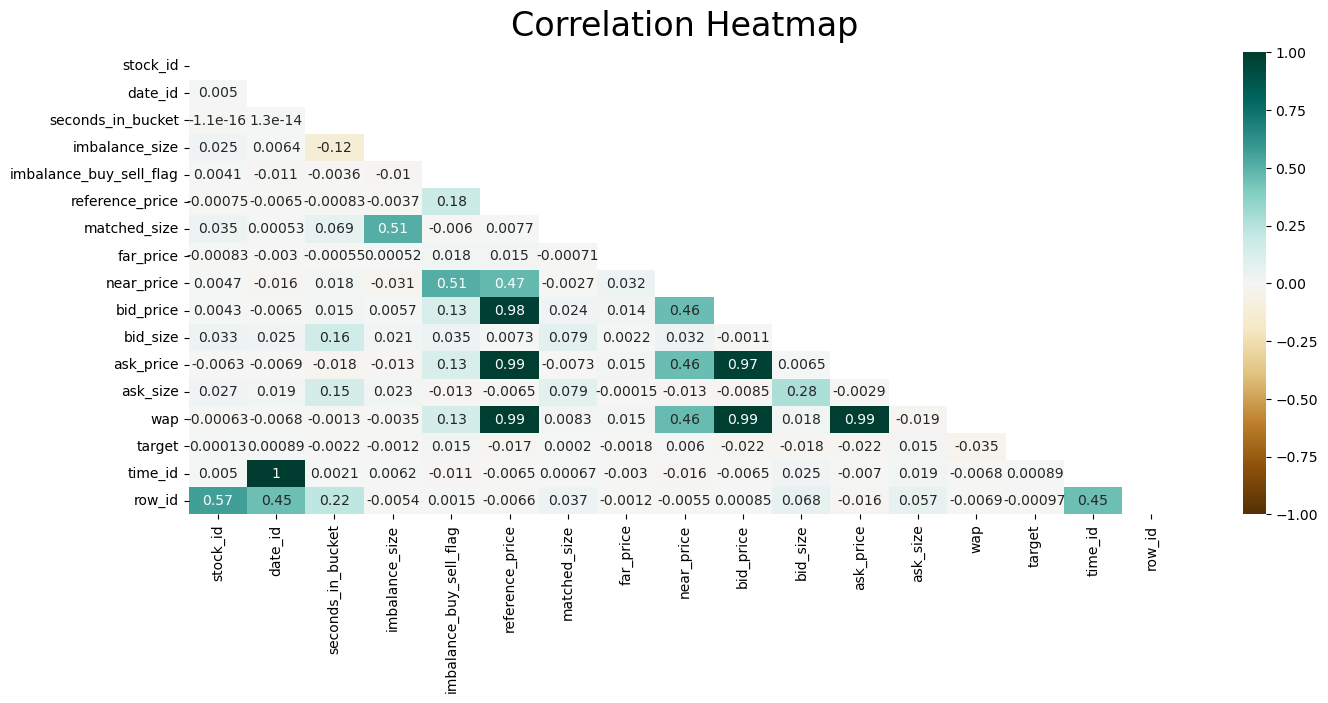

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=6)
fig.set_size_inches(20, 25)

for col, ax in zip(df_train.columns, axes.flat):
    sns.histplot(df_train, x=col, ax=ax).set(title=f'{col} distribution')

fig.subplots_adjust(hspace=0.15)
axes[-1, -1].axis('off')
plt.show()